In [34]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\ndeep\Desktop\energy7\preprocess\nonull\NR2_TWS.csv"
ts_data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
ts_data.head(), ts_data.columns


(               Time           Site Name Point Machine Name Direction  \
 0   10-02-2025 3.44  Faridabad New Town              PT140   Reverse   
 1   10-02-2025 3.50  Faridabad New Town              PT140    Normal   
 2   10-08-2024 2.05  Faridabad New Town              PT140   Reverse   
 3   10-08-2024 2.08  Faridabad New Town              PT140    Normal   
 4  10-08-2024 10.33  Faridabad New Town              PT140   Reverse   
 
                                            A Current  \
 0  [0.0, 3.1, 3.9, 4.7, 5.2, 5.5, 5.6, 5.6, 5.4, ...   
 1  [0.0, 1.3, 2.4, 3.3, 3.9, 4.2, 4.4, 4.5, 4.4, ...   
 2  [0.0, 5.2, 5.2, 5.0, 4.9, 4.6, 4.4, 4.2, 4.0, ...   
 3  [0.0, 1.9, 2.0, 2.0, 2.0, 2.1, 2.1, 2.2, 2.2, ...   
 4  [0.0, 5.3, 5.2, 5.1, 4.9, 4.6, 4.4, 4.2, 4.0, ...   
 
                                            A Voltage  \
 0  [0.0, 97.5, 89.4, 82.5, 77.4, 74.1, 72.7, 72.6...   
 1  [0.0, 13.8, 24.4, 29.5, 35.1, 41.1, 47.1, 52.9...   
 2  [0.0, 73.8, 74.2, 75.6, 77.2, 79.3, 81.3,

In [35]:
print(ts_data['Point Machine Name'].unique())


['PT140' 'PT104' 'PT105' 'PT 135/136' 'PT 133/134' 'PT 107/108'
 'PT 105/106' 'PT 109/110' 'PT 103/104' 'PT 101/102']


In [3]:
import ast
import matplotlib.pyplot as plt

# Convert stringified lists to actual lists
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    ts_data[col] = ts_data[col].apply(ast.literal_eval)

# Plot time-series data for a few point machines
def plot_point_machine(machine_name, n_samples=3):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name].head(n_samples)
    for idx, row in subset.iterrows():
        fig, axs = plt.subplots(2, 2, figsize=(15, 8))
        fig.suptitle(f"Point Machine: {machine_name} | Direction: {row['Direction']} | Time: {row['Time']}", fontsize=14)

        axs[0, 0].plot(row['A Current'])
        axs[0, 0].set_title("A Current")

        axs[0, 1].plot(row['A Voltage'])
        axs[0, 1].set_title("A Voltage")

        axs[1, 0].plot(row['B Current'])
        axs[1, 0].set_title("B Current")

        axs[1, 1].plot(row['B Voltage'])
        axs[1, 1].set_title("B Voltage")

        plt.tight_layout()
        plt.show()

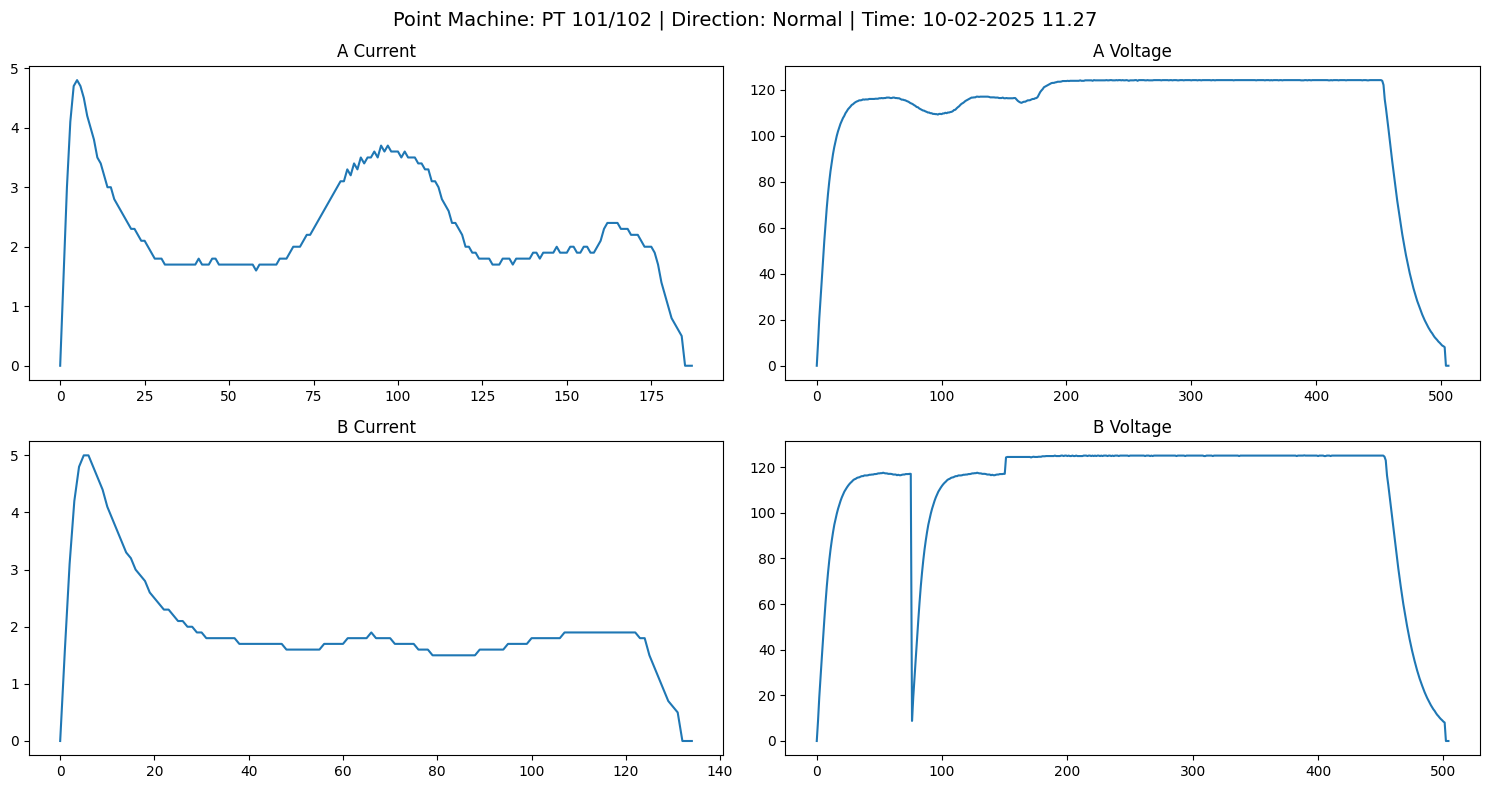

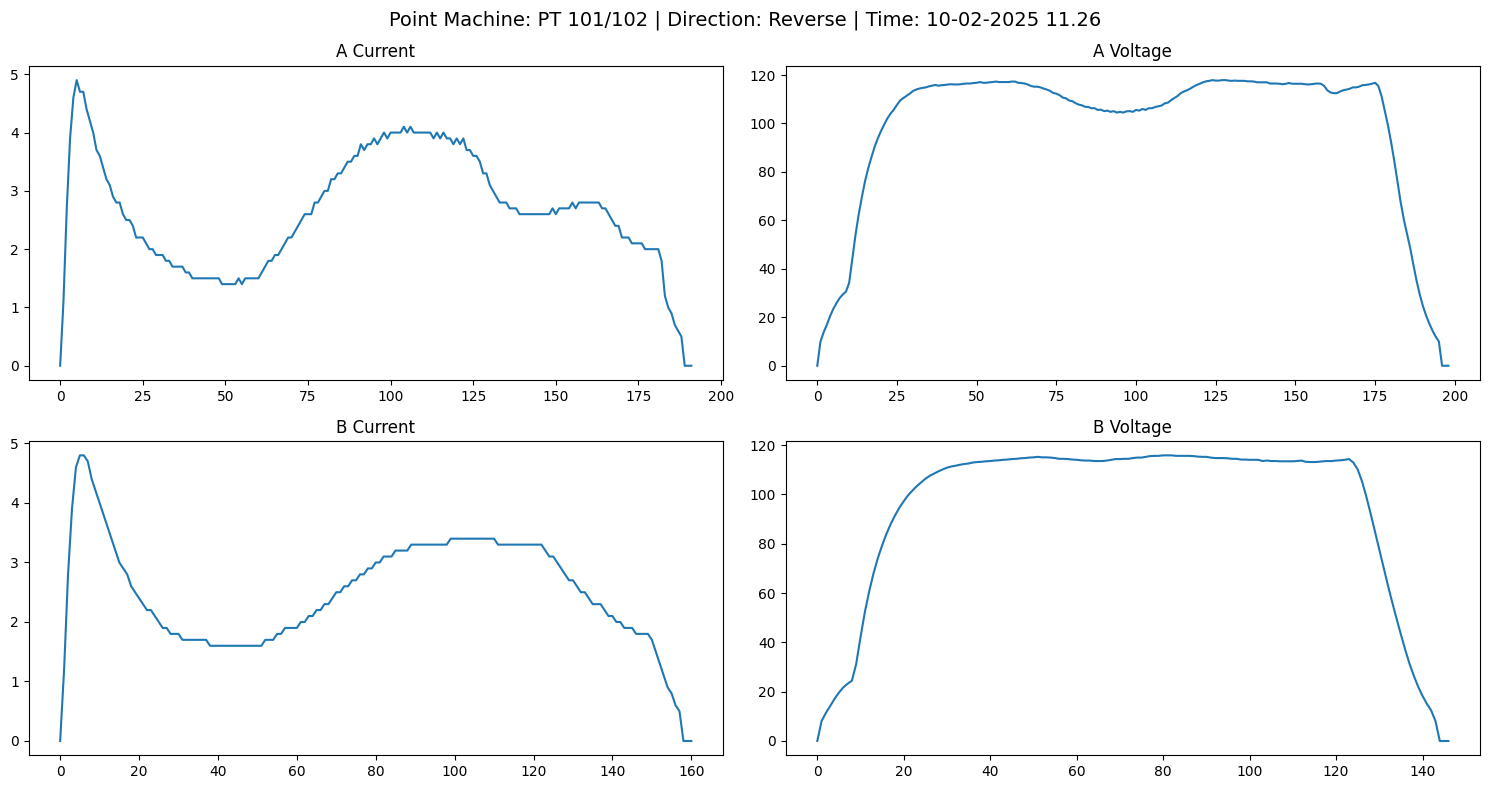

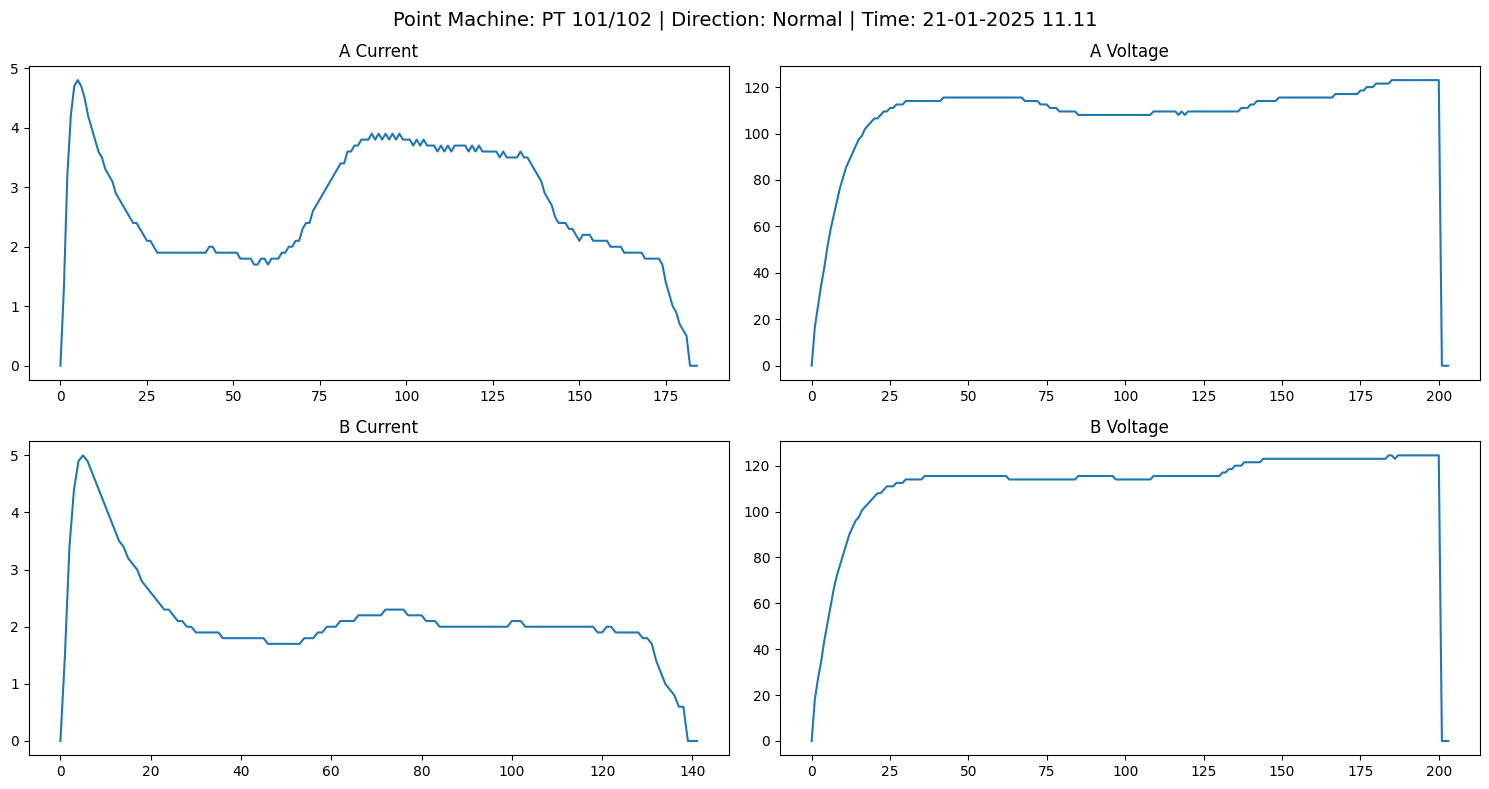

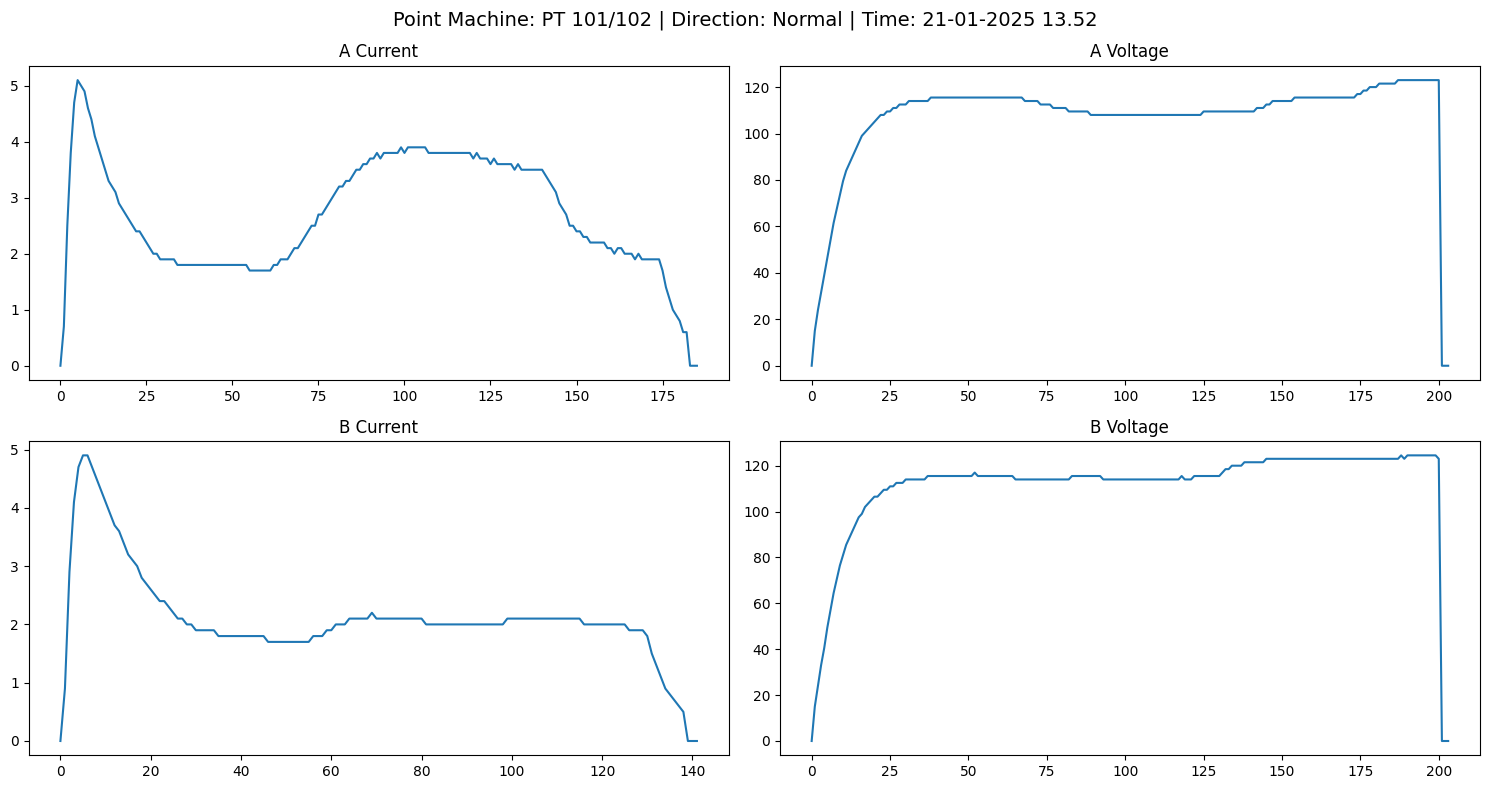

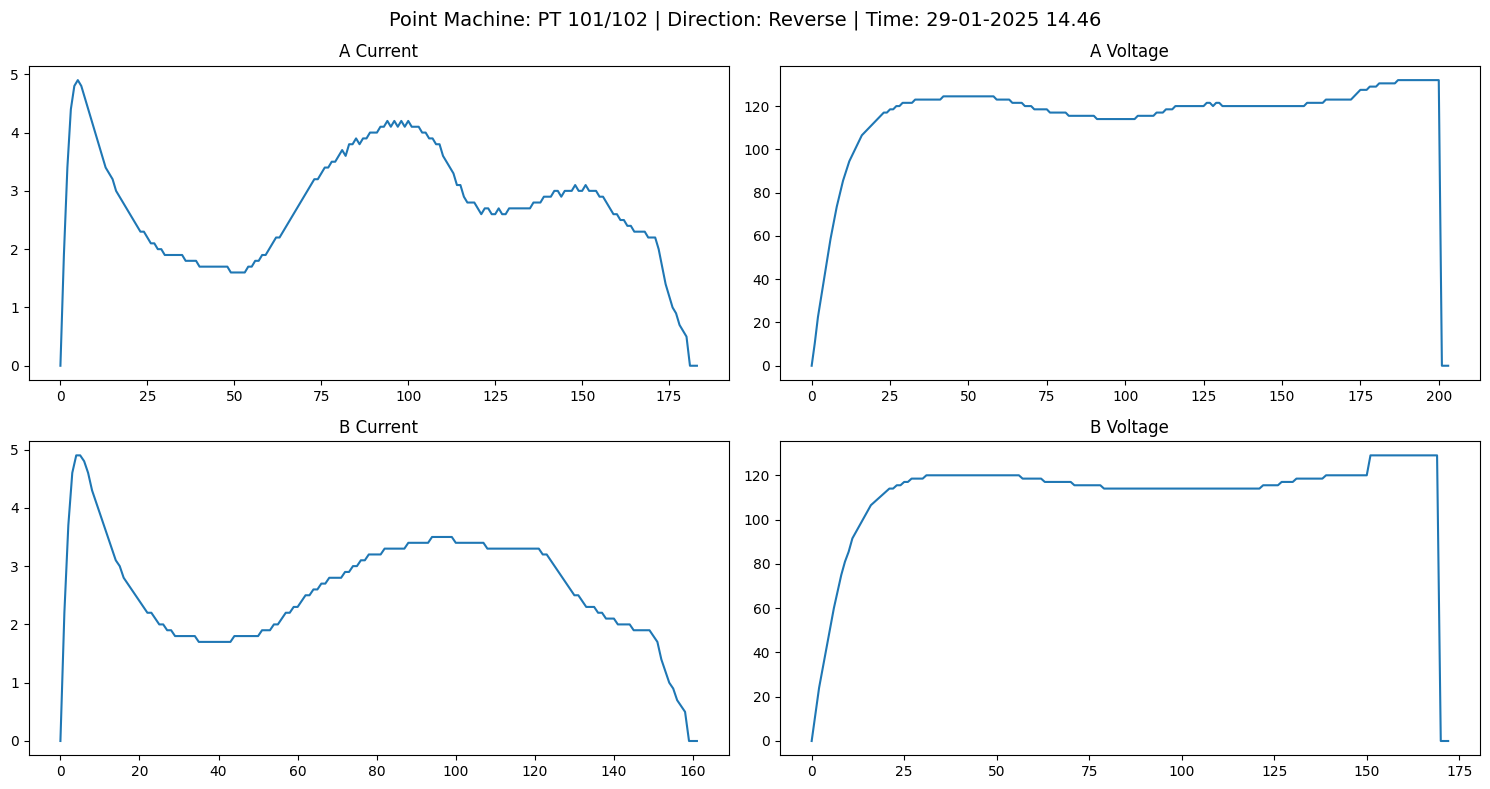

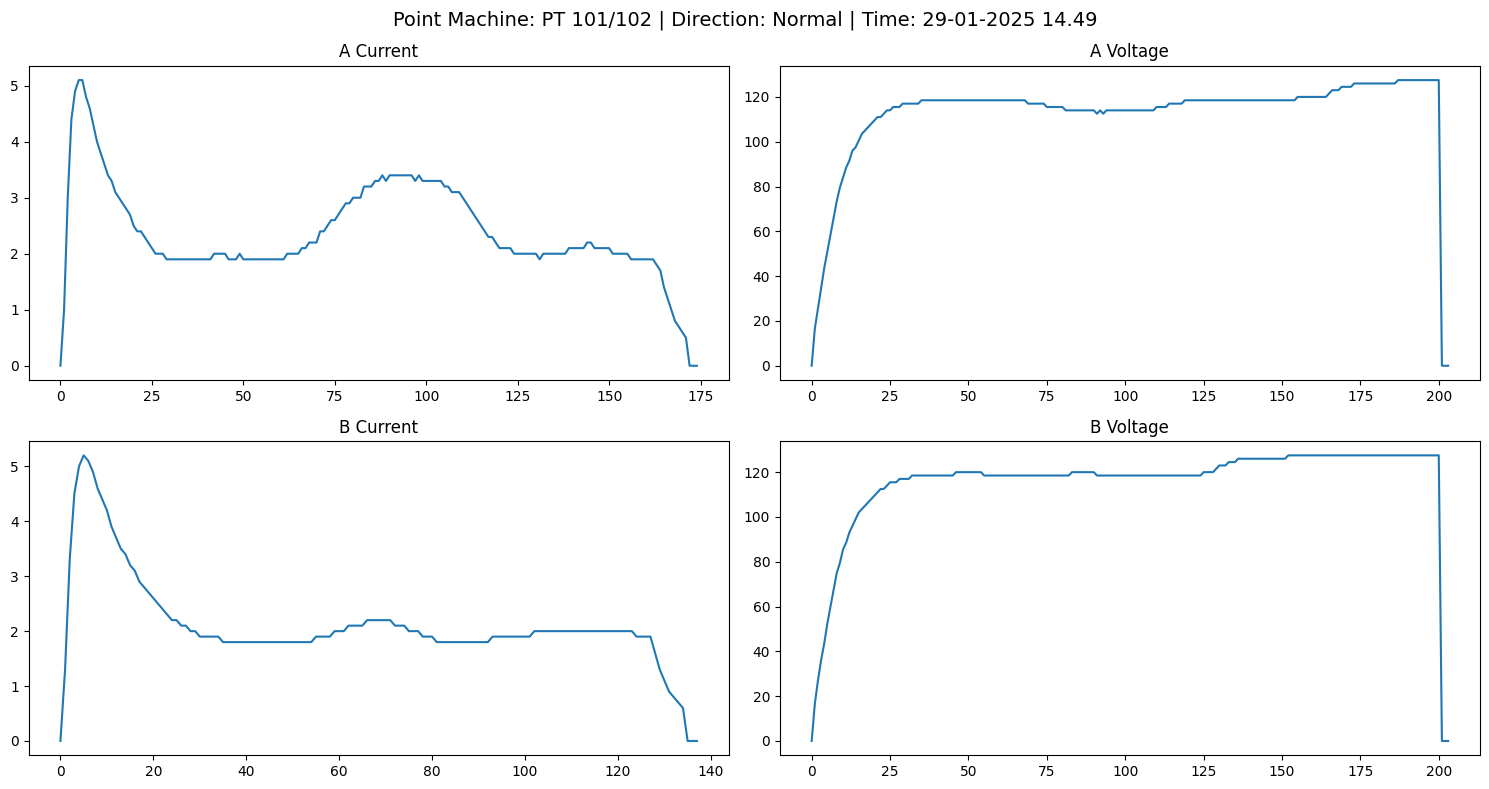

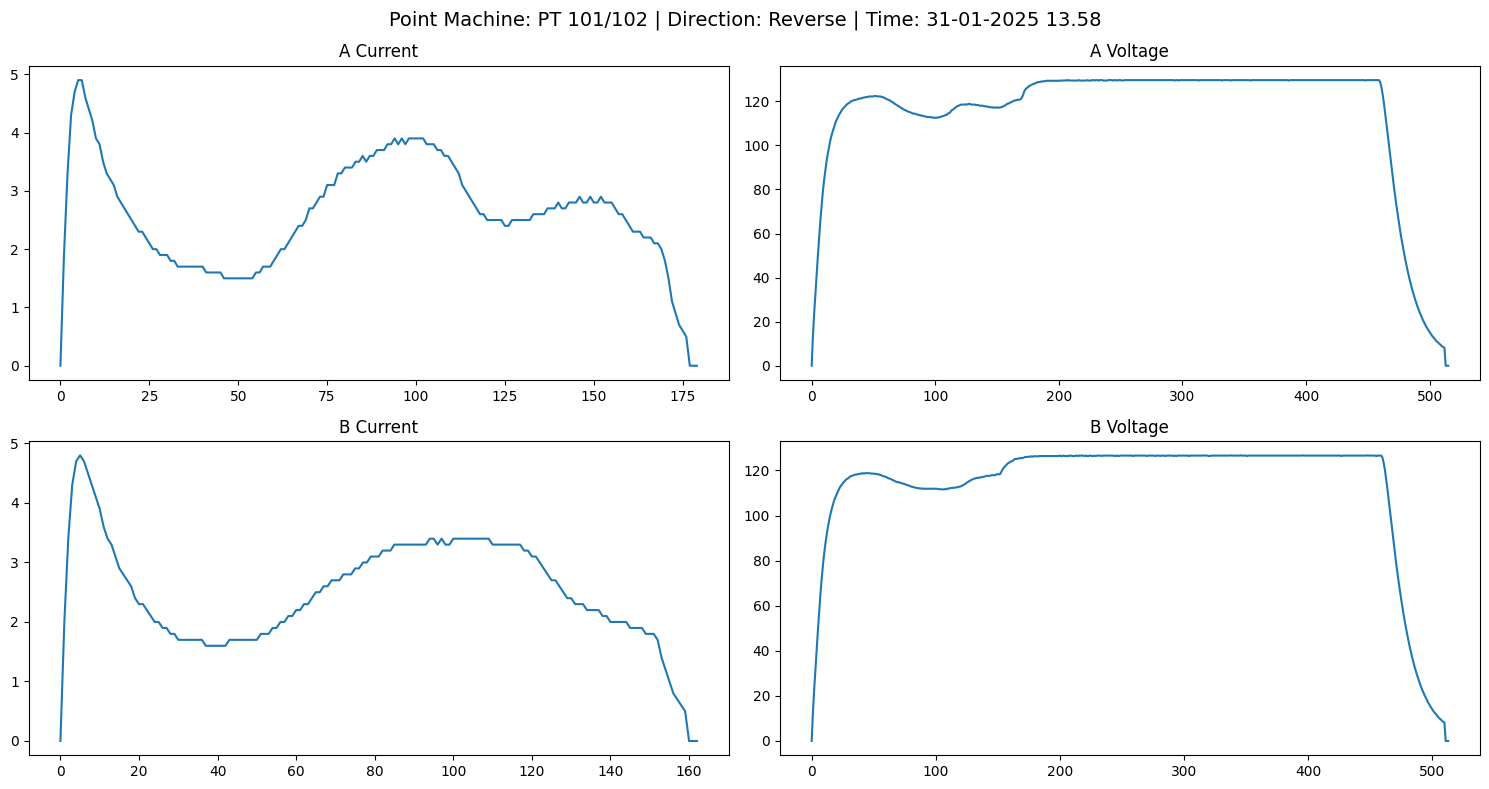

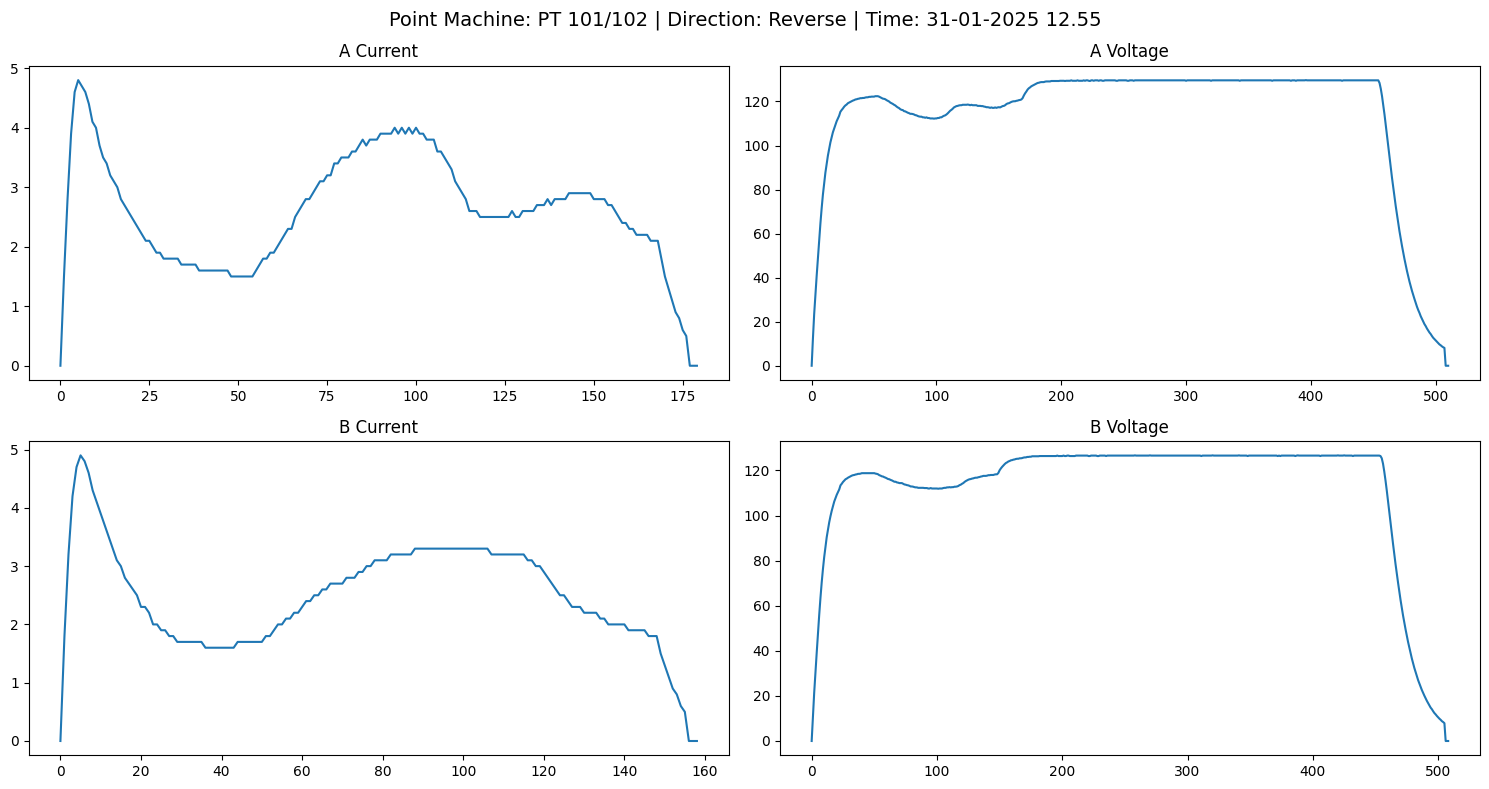

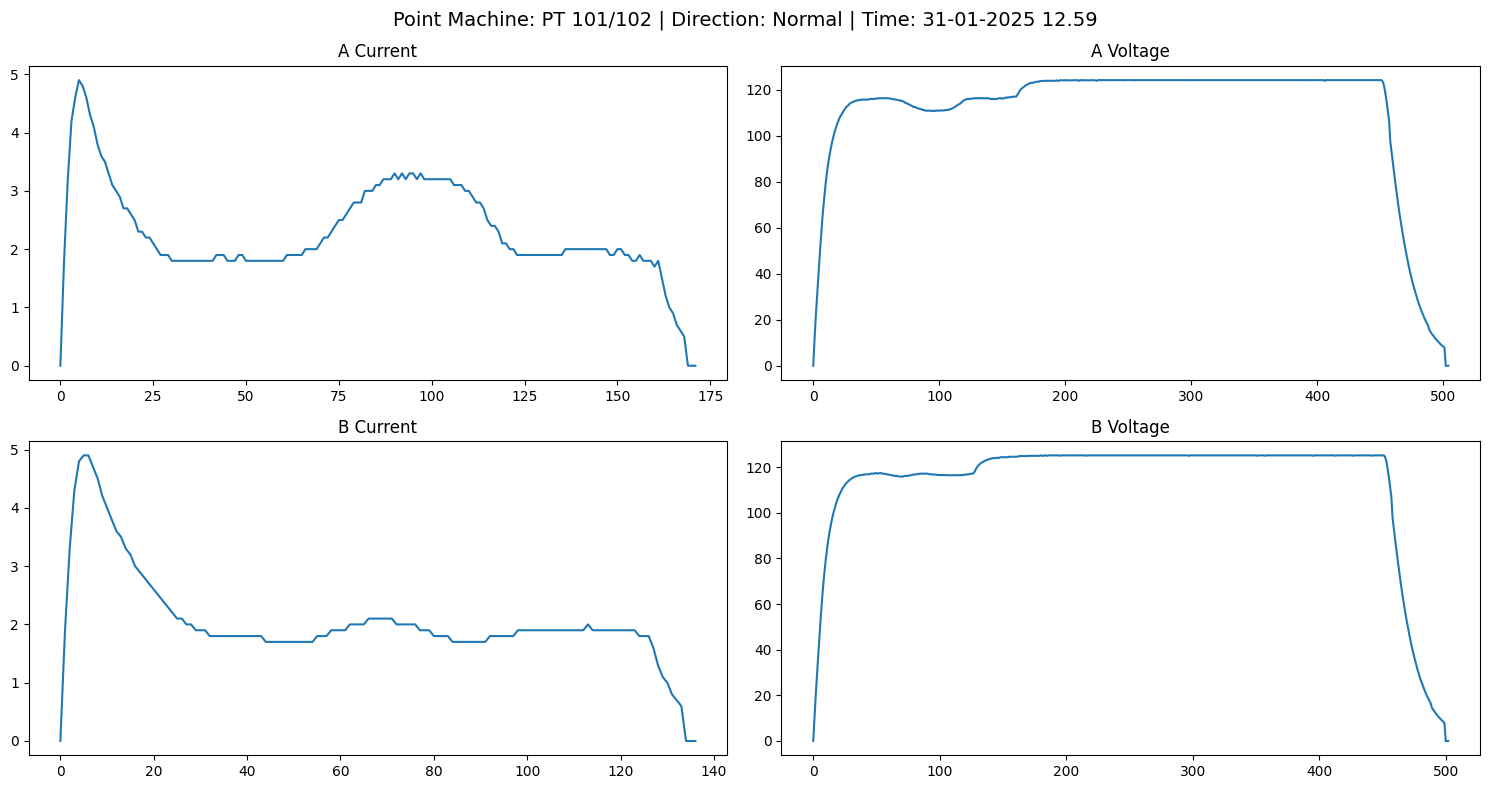

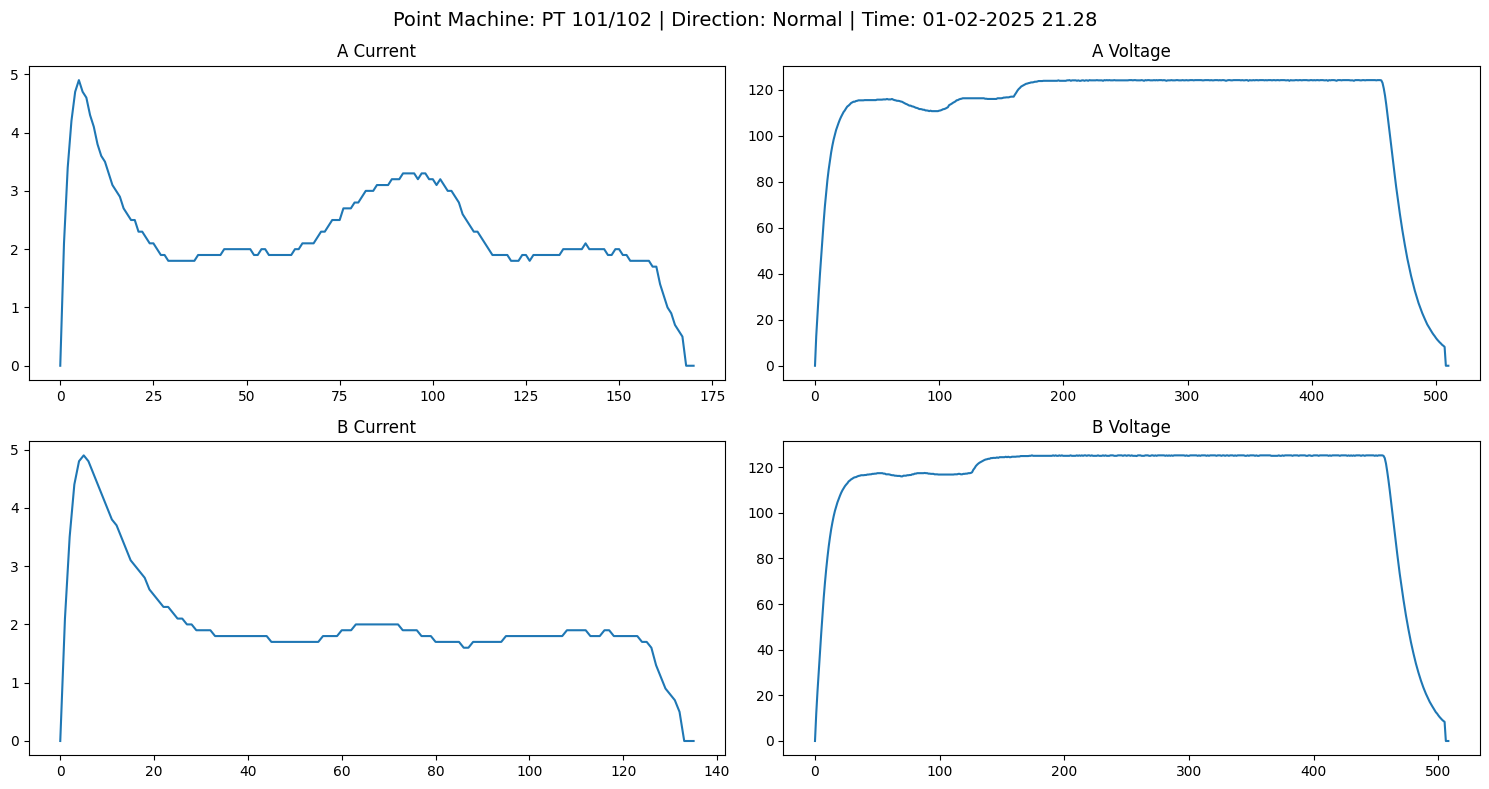

In [30]:

plot_point_machine("PT 101/102", n_samples=10)
#PT139

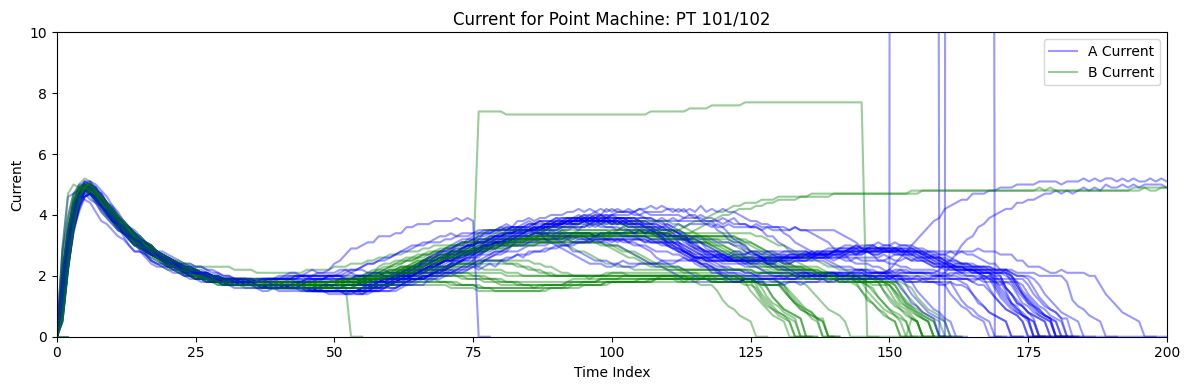

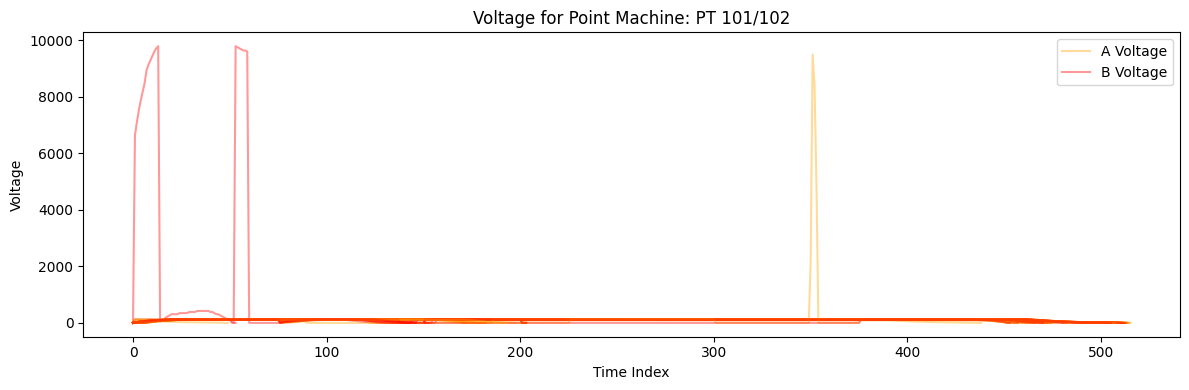

In [31]:
import ast
import matplotlib.pyplot as plt

# Convert stringified lists to actual lists
def safe_literal_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return []  # fallback in case of bad string
    elif isinstance(val, list):
        return val
    else:
        return []

# Apply the safe converter
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    ts_data[col] = ts_data[col].apply(safe_literal_eval)

# Function to plot combined current and voltage graphs per Point Machine
def plot_point_machine_combined(machine_name):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name]

    # --- Plot Current ---
    plt.figure(figsize=(12, 4))
    for idx, row in subset.iterrows():
        plt.plot(row['A Current'], alpha=0.4, label='A Current' if idx == subset.index[0] else "", color='blue')
        plt.plot(row['B Current'], alpha=0.4, label='B Current' if idx == subset.index[0] else "", color='green')
    plt.title(f"Current for Point Machine: {machine_name}")
    plt.xlabel("Time Index")
    plt.ylabel("Current")
    plt.ylim(0,10)
    plt.xlim(0,200)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Plot Voltage ---
    plt.figure(figsize=(12, 4))
    for idx, row in subset.iterrows():
        plt.plot(row['A Voltage'], alpha=0.4, label='A Voltage' if idx == subset.index[0] else "", color='orange')
        plt.plot(row['B Voltage'], alpha=0.4, label='B Voltage' if idx == subset.index[0] else "", color='red')
    plt.title(f"Voltage for Point Machine: {machine_name}")
    plt.xlabel("Time Index")
    plt.ylabel("Voltage")
    # plt.ylim(0,1000)
    # plt.xlim(0,200)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Loop through all point machines
# for machine in ts_data['Point Machine Name'].unique():
plot_point_machine_combined("PT 101/102")
